### Metodos númericos. Simulaciones de Monte Carlo.

La simulación de Monte Carlo es una técnica matemática que predice resultados futuros de eventos aleatorios. Se basa en datos históricos y en la ejecución de simulaciones aleatorias.

#### Números (pseudo) aleatorios

Los números pseudoaleatorios son una parte fundamental de muchos algoritmos y aplicaciones, especialmente en simulaciones, juegos, pruebas de software, criptografía y métodos estadísticos como Monte Carlo. A pesar de que los llamamos "aleatorios", estos números son generados por un proceso completamente determinista.

Los números pseudoaleatorios son secuencias de números que, aunque generados por un algoritmo determinista a partir de una semilla inicial, presentan propiedades estadísticas de aleatoriedad. Esto significa que, aunque son predecibles si conoces la semilla y el algoritmo, para la mayoría de los propósitos prácticos, se comportan como si fueran secuencias aleatorias.

La mayoria de los generadores de números pseudoaleatorios (PRNG) se implementan mediante el método de congruencia lineal.

#### Método de Congruencia Lineal

Este método genera números pseudoaleatorios mediante la siguiente sucesión:

$$
X_{n+1} = (a \times X_n + c) \mod m
$$

donde:
- $X$ es la secuencia de números pseudoaleatorios,
- $a$ es el multiplicador,
- $c$ es el incremento,
- $m$ es el módulo,
- $X_0$ es el valor inicial, o semilla.

In [ ]:
class LinearCongruentialGenerator:
    def __init__(self, seed, a = 1664525, c = 1013904223, m = 2**32):
        self.state = seed
        self.a = a
        self.c = c
        self.m = m

    def next(self):
        self.state = (self.a * self.state + self.c) % self.m
        return self.state

    def next_float(self):
        return self.next() / self.m

    # numeros entre 0 y n-1
    def next_int(self, n):
        return int((self.next_float()*n) // 1)  # quita la parte decimal

# Crear una instancia del generador con una semilla inicial
seed = 42
rng = LinearCongruentialGenerator(seed)

# Generar 20000 números pseudoaleatorios y visualizarlos
random_numbers = [rng.next_float() for _ in range(20000)]

print("Veamos los 10 primeros numeros:", random_numbers[:10])

Veamos los 10 primeros numeros: [0.2523451747838408, 0.08812504541128874, 0.5772811982315034, 0.22255426598712802, 0.37566019711084664, 0.02566390484571457, 0.4472812858875841, 0.1184600037522614, 0.8738137057516724, 0.9946342753246427]


Se puede apreciar que son numeros reales positivos entre 0 y 1, revisemos como se distribuyen.

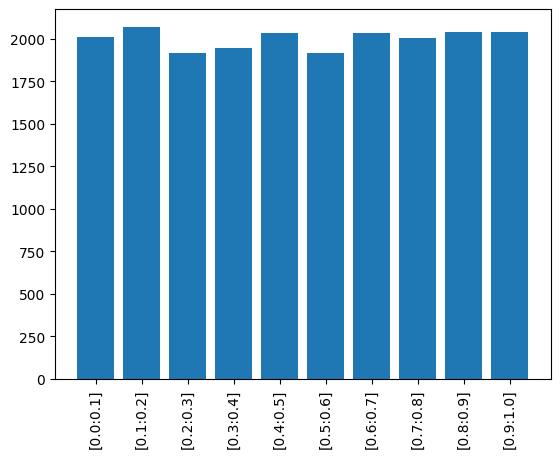

In [31]:
import matplotlib.pyplot as plt

# distribucion en 10 intervalos
intervals = 10  # la idea es contar cuantos numeros hay por cada 0.1
times = [0]*10
labels = []
for i in range(intervals):
    start = i*0.1
    end = (i+1)*0.1
    labels.append("["+'{0:3.1f}'.format(start)+":"+'{0:3.1f}'.format(end)+"]")
for i in random_numbers:
    times[int((intervals*i)//1)] += 1
plt.bar(labels, times)
plt.xticks(rotation=90)
plt.show()

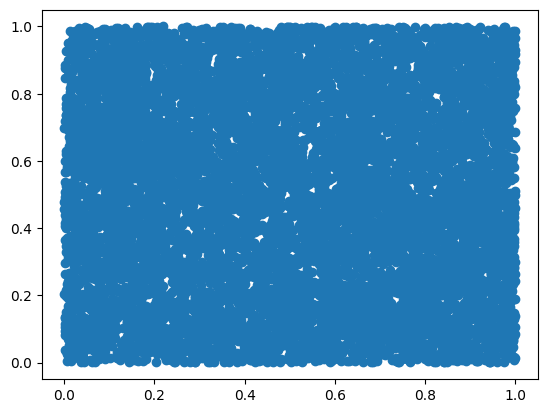

In [32]:
# veamos ahora como se distribuye en el plano x e y, dividiendolo en mitades

plt.scatter(random_numbers[:len(random_numbers)//2], random_numbers[len(random_numbers)//2:])
plt.show()

Parece correcto, tambien podemos generar, numeros enteros, si se fijan next_int hace lo mismo que cuando lo pasamos a los 10 intervalos. Veamos un ejemplo con dados:

In [37]:
caras = 6
# debe haberse corrido la clase anterior
dados = [1+rng.next_int(caras) for _ in range(60000)]
print("algunos dados:", dados[:20])

algunos dados: [3, 6, 3, 6, 5, 4, 4, 1, 3, 5, 5, 2, 6, 5, 4, 5, 2, 6, 5, 4]


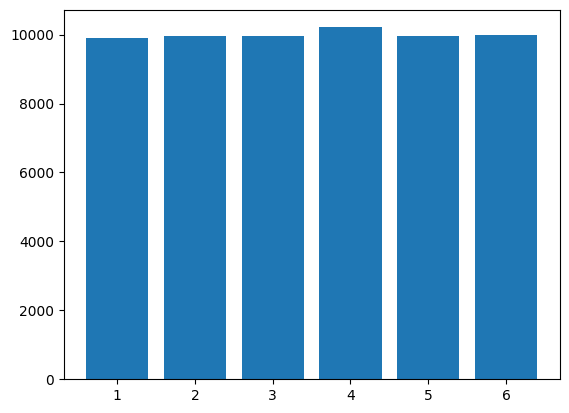

In [38]:
x = list(range(1,7))
y = []
for i in x:
    y.append(dados.count(i))
plt.bar(x,y)
plt.show()

Se ve bien, pero en realidad para la generación de numeros aleatorios hay paquetes estandar como random (es un PRNG denominado Mersenne Twister) y np.random (numpy).

Algunas funcionalidad de random:

In [45]:
import random

numeros = [random.random()]
numeros += [random.random()]
print("random (numeros entre 0 y 1):", numeros)

numeros = []
for i in range(3):
    random.seed(12345)
    numeros += [random.random()]
print("random desde la misma semilla:", numeros)

numeros = []
for i in range(20):
    numeros += [random.randint(1,6)]
print("randint (ejemplo dados):", numeros)
print("fijese que salen los mismos dados si se ejecuta de nuevo...")

random (numeros entre 0 y 1): [0.9580647850995486, 0.09129409887673512]
random desde la misma semilla: [0.41661987254534116, 0.41661987254534116, 0.41661987254534116]
randint (ejemplo dados): [1, 3, 3, 2, 3, 5, 4, 2, 3, 1, 4, 3, 5, 6, 2, 5, 5, 2, 3, 6]
fijese que salen los mismos dados si se ejecuta de nuevo...


In [57]:
# mas ejemplos
bolas = ["red"]*3 + ["white"]*2 + ["black"]
print("Tombola:", bolas)
print("choice:", random.choice(bolas))
random.shuffle(bolas)
print("shuffle:", bolas)

Tombola: ['red', 'red', 'red', 'white', 'white', 'black']
choice: red
shuffle: ['red', 'white', 'white', 'red', 'black', 'red']


#### Ejemplo: Campana de Gauss

https://es.wikipedia.org/wiki/Funci%C3%B3n_gaussiana

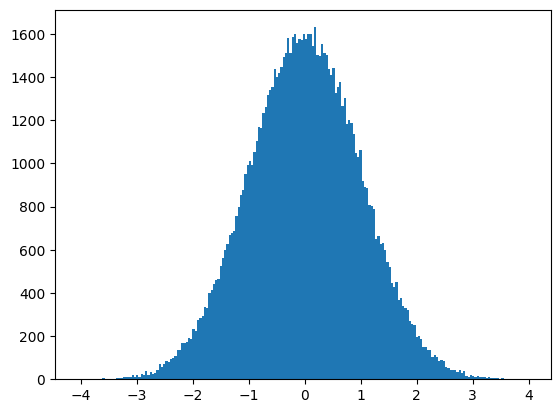

In [48]:
import random 
import matplotlib.pyplot as plt 
nums = [] 
for i in range(100000): 
    nums.append(random.gauss(0, 1))
plt.hist(nums, bins = 200) 
plt.show() 

Todo lo podriamos hacer con random, pero numpy.random tiene más funcionalidades, funciona muy similar, sin embargo es posible modificar el PRNG.

Adicionalmente es posible pedir un conjunto de numeros aleatorios directamente en np.array, lo que lo hace más comodo. Lo puede estudiar en:

https://numpy.org/doc/2.1/reference/random/index.html

Regularmente, en las simulaciones en los cursos de modelos estocasticos existe las distribuciones binomial y poisson, aqui unos ejemplos:

https://en.wikipedia.org/wiki/Binomial_distribution

https://en.wikipedia.org/wiki/Poisson_distribution

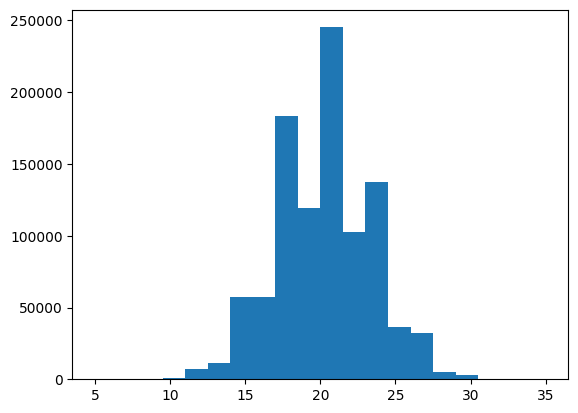

In [101]:
# Ejemplo binomial
import numpy as np
samples = np.random.binomial(n=40, p=.5, size=1000000)
plt.hist(samples, 20)
plt.show()

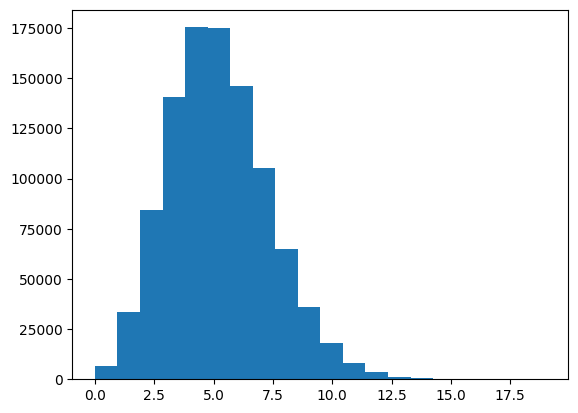

In [100]:
# Ejemplo poisson
import numpy as np
samples = np.random.poisson(5, 1000000)
plt.hist(samples, 20)
plt.show()

In [58]:
# proxima clase.... ahora si veremos los metodos numericos Monte Carlo